In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fast_control.viz.episodic_plot import *
from fast_control.viz.animate import create_animation
from fast_control.viz.plot import *
from fast_control.controller_factory import (
    train_controllers,
    ControllerFactory,
    train_episodic_with_info,
    info_data_gen
)
from fast_control.gp_factory import init_gp_dict, GPFactory
from core.systems import DoubleInvertedPendulum
import sys
import mosek
import numpy as np
import toml
import pickle
import dill

In [9]:
import numpy as np
my = np.arange(30)
my[:29]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])

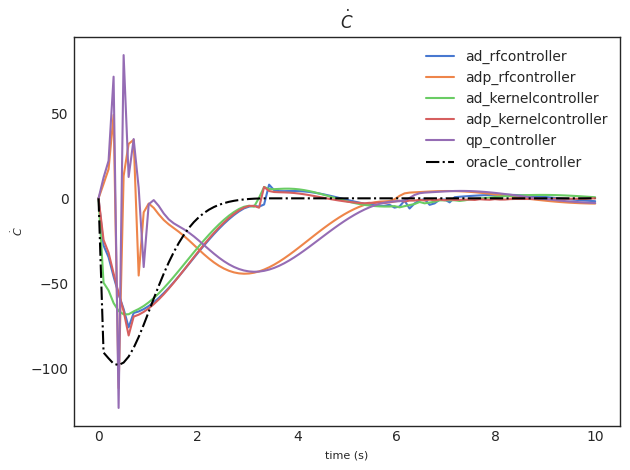

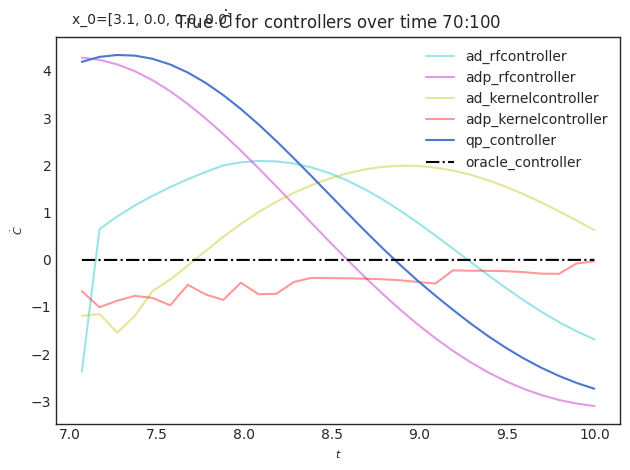

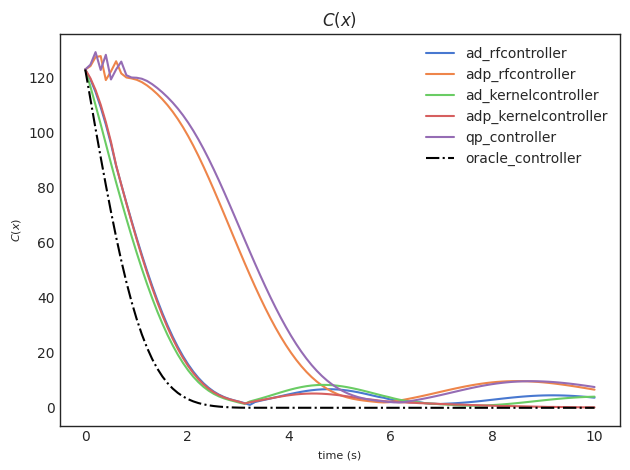

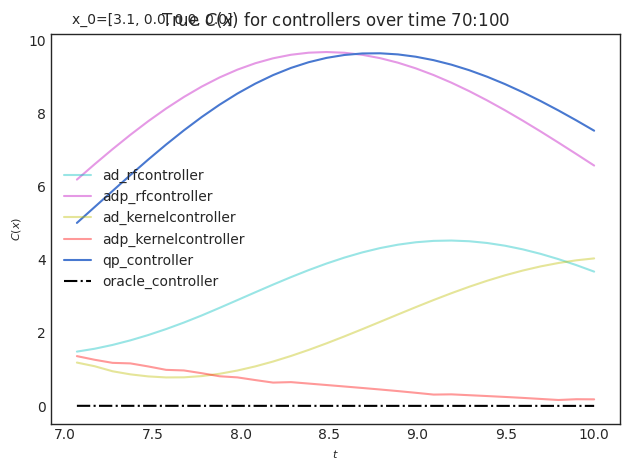

In [5]:
#reg_param and sigma = 0.1 , 1

np.set_printoptions(threshold=sys.maxsize)
with open("/home/kk983/fast_control/config.toml") as f:
    config = toml.load(f)
sys_conf = config["controller_factory"]
gps_names = config['gps'].keys()
 
c_names = [gp_name +'controller' for gp_name in gps_names]
system = DoubleInvertedPendulum(*sys_conf["sys_params"])
system_est = DoubleInvertedPendulum(*sys_conf["sys_est_params"])
control = ControllerFactory(system, system_est)
gp_factory = GPFactory()
data_path = "/home/kk983/fast_control/data/"
init_data = np.load(data_path+"grid/init_grid_medium.npz")
xs, ys, zs = init_data['xs'], init_data['ys'], init_data['zs']
data = init_gp_dict(gp_factory, xs, ys, zs)
controllers, gps = train_controllers(control, gp_factory, data)
gp_zs, qp_zs, model_zs, ts = info_data_gen(control, controllers, x_0=[2,0,0,0])
np.savez(data_path+"eval_cs", gp_zs=gp_zs, qp_zs=qp_zs, model_zs=model_zs, ts=ts)
c_names = [gp_name +'controller' for gp_name in gps_names]
plot_info(control.x_0, c_names, data_path+"eval_cs.npz", c_cdot=1)
plot_info(control.x_0, c_names, data_path+"eval_cs.npz", c_cdot=0)

In [6]:
import numpy as np

phi_test = np.array([[1,1,1,3,3,3]]) #(n_t,s)n_t=1,s=6,d=3,m+1=2
np.shape(phi_test)
test = phi_test.reshape((2,-1))#(m+1,d)
print(test)
cphi = np.array([[3,3,3,7,7,7],[1,1,1,4,4,4]]) #(n,s) n=2
inv_cphi = cphi.T @ cphi #(s,s)
# print(inv_cphi)
inv = inv_cphi.reshape((-1, 3, 2, 3))  # (m+1,rf_d,m+1,rf_d)
np.einsum("ij,ijkl,kl->ik", test, inv, test)
mat = np.arange(36).reshape((6,6))
# print(mat)
ch = mat.reshape((-1,3,2,3),order='C')
# print(ch)
hard_way = np.einsum("ij,ijkl,kl->ik", test, ch, test)
same_test = np.array([[1,1,1,0,0,0],[0,0,0,3,3,3]])
print(same_test@mat@same_test.T)
print(hard_way)
# test = self.phi_test.reshape((self.m + 1, -1))  # (m+1,rf_d)
#         inv = self.inv_cphi.reshape(
#             (-1, self.rf_d, self.m + 1, self.rf_d)
#         )  # (m+1,rf_d,m+1,rf_d)
#         sigmavar = np.sqrt(self.reg_param) * sqrtm(
#             abs(np.einsum("ij,ijkl,kl->ik", test, inv, test))
#         )  # (m+1,m+1)
#         # norm(y @ sigmavar.T)
#         return sigmavar.T


[[1 1 1]
 [3 3 3]]
[[  63  270]
 [ 675 2268]]
[[  63  270]
 [ 675 2268]]
